### Questions for analysis

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [1]:
#importing the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import dateutil.parser

In [2]:
#importing our dataset
sales = pd.read_csv('sales_data.csv')
sales


,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash


The sales dataset has 1000 rows and 8 columns of data.

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [4]:
#checking the data type 
sales.dtypes

date             object
warehouse        object
client_type      object
product_line     object
quantity          int64
unit_price      float64
total           float64
payment          object
dtype: object

In [5]:
#checking for missing value
sales.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [6]:
#converting date column to date_time
sales['date'] = pd.to_datetime(sales['date'])

In [7]:
sales.dtypes

date            datetime64[ns]
warehouse               object
client_type             object
product_line            object
quantity                 int64
unit_price             float64
total                  float64
payment                 object
dtype: object

In [8]:
#the unique productlines
sales['product_line'].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [9]:
#the unique warehouse
sales['warehouse'].unique()

array(['Central', 'North', 'West'], dtype=object)

## Question 1
### What are the total sales for each payment method?

In [10]:
#total sales for each payment method
total_sales_payment = sales.groupby('payment', as_index=False).sum('total')
total_sales_payment

,payment,quantity,unit_price,total
0,Cash,627,3479.98,19199.10
1,Credit card,3588,19992.33,110271.57
2,Transfer,5180,6849.73,159642.33


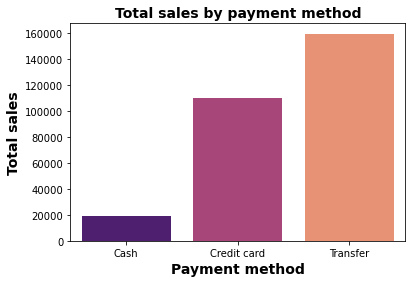

In [11]:
#plotting a barchart for question 1
sns.barplot(x='payment', y='total', data=total_sales_payment, palette='magma')
plt.xlabel('Payment method',fontweight='bold', size=14)
plt.ylabel('Total sales',fontweight='bold', size=14)
plt.title('Total sales by payment method', fontweight='bold', size=14)
plt.show()

### Question 2.
#### What is the average unit price for each product line?

In [12]:
#average unit price for each product line
avg_unit_price_product_line = sales.groupby('product_line', as_index=False).mean('unit_price')
avg_unit_price_product_line

,product_line,quantity,unit_price,total
0,Breaking system,9.260870,17.740522,166.739783
1,Electrical system,8.797927,25.585130,225.972591
2,Engine,10.278689,60.091803,622.055410
3,Frame & body,9.753012,42.832229,415.811627
4,Miscellaneous,9.639344,22.810738,222.670656
5,Suspension & traction,9.407895,33.969868,320.237763


Text(0, 0.5, 'Product_line')

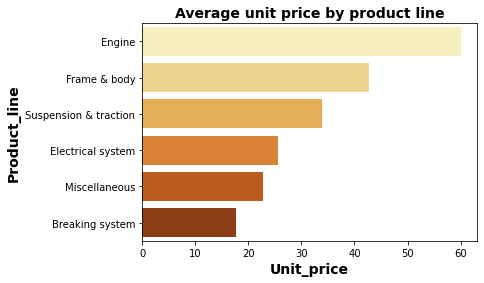

In [13]:
#plotting a chart for the average unit price per product line
sns.barplot(data=avg_unit_price_product_line.sort_values('unit_price', ascending=False) ,
            x='unit_price', y='product_line', palette='YlOrBr')
plt.title('Average unit price by product line',fontweight='bold', size=14 )
plt.xlabel('Unit_price', fontweight='bold', size=14,)
plt.ylabel('Product_line', fontweight='bold', size=14)

#plt.tight_layout()


#### Question 4; Further investigation

In [14]:
#Finding the average purchase value by client type
avg_purchase_client_type = sales.groupby('client_type').mean('total')
avg_purchase_client_type

,quantity,unit_price,total
client_type,,,
Retail,5.438710,30.286852,167.058929
Wholesale,23.022222,30.443244,709.521467


In [15]:
#finding the total purchase value by product line
total_by_product_line = sales.groupby('product_line', as_index=False).sum('total')
total_by_product_line

,product_line,quantity,unit_price,total
0,Breaking system,2130,4080.32,38350.15
1,Electrical system,1698,4937.93,43612.71
2,Engine,627,3665.60,37945.38
3,Frame & body,1619,7110.15,69024.73
4,Miscellaneous,1176,2782.91,27165.82
5,Suspension & traction,2145,7745.13,73014.21


Text(0, 0.5, 'Product_line')

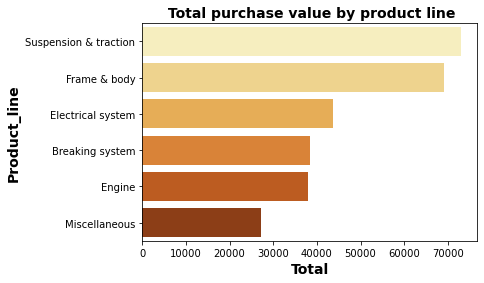

In [16]:
#plotting a barchart
sns.barplot(x='total', y='product_line',
            data=total_by_product_line.sort_values('total', ascending=False), palette='YlOrBr')
plt.title(' Total purchase value by product line',fontweight='bold', size=14 )
plt.xlabel('Total', fontweight='bold', size=14,)
plt.ylabel('Product_line', fontweight='bold', size=14)


### Which warehouse was used the most?

In [17]:
#finding the warehouse used the most
sales.groupby('warehouse').count()

,date,client_type,product_line,quantity,unit_price,total,payment
warehouse,,,,,,,
Central,480,480,480,480,480,480,480
North,340,340,340,340,340,340,340
West,180,180,180,180,180,180,180


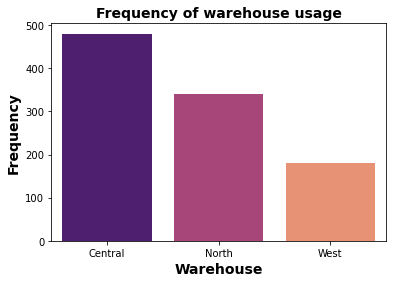

In [18]:
sns.countplot(x='warehouse', data=sales, palette='magma')
plt.xlabel('Warehouse',fontweight='bold', size=14)
plt.ylabel('Frequency',fontweight='bold', size=14)
plt.title('Frequency of warehouse usage', fontweight='bold', size=14)
plt.show()                    

In [19]:
#finding the frequency with which the paymemt methods were used
payment_count = sales.groupby('payment', as_index=False).count()
payment_count

,payment,date,warehouse,client_type,product_line,quantity,unit_price,total
0,Cash,116,116,116,116,116,116,116
1,Credit card,659,659,659,659,659,659,659
2,Transfer,225,225,225,225,225,225,225


Text(0.5, 1.0, 'Payment method frequency')

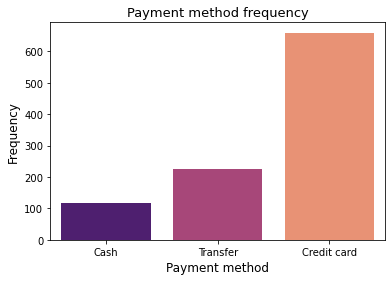

In [21]:
sns.barplot(x='payment', y='total', data=payment_count.sort_values('total'), palette='magma')
plt.xlabel('Payment method', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Payment method frequency', size=13)

#### An interesting fact was discovered here; even though payment by credit card was used the most, with a count of 659, payment by transfer method brought in the highest sales.

In [22]:
#extracting month from date column
sales['month']= sales['date'].dt.month
sales

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,month
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,6
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,6
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,6
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,6
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,6
...,...,...,...,...,...,...,...,...,...
995,2021-08-28,Central,Retail,Electrical system,9,32.87,295.83,Credit card,8
996,2021-08-28,West,Wholesale,Breaking system,32,10.03,320.96,Transfer,8
997,2021-08-28,West,Wholesale,Electrical system,12,32.80,393.64,Transfer,8
998,2021-08-28,North,Retail,Frame & body,5,48.25,241.23,Cash,8


In [23]:
#grouping total sales by month.
monthly_sales = sales.groupby('month', as_index=False).sum('total')
monthly_sales

,month,quantity,unit_price,total
0,6,3044,10488.45,95320.03
1,7,3160,10332.91,93547.91
2,8,3191,9500.68,100245.06


#### Question 5 
summarize your findings

. The sales dataset was gotten from datacamp.It has 1000 rows and 8 columns with no null values

. There are 6 unique product lines; Miscellaneous, breaking system, suspension & traction, 
  Frame & body, Engine and Electrical system

. The sales dataset also contains 3 unique warehouses; Central, North, and west.

. The payment method that brought the highest sales was transfer; $159,642.33  followed  by 
  credit card; $110,271 and cash was the lowest; $19199.10

. Whosale brought in more sales than retail. wholesales  made an average  of  $709,52 and retail was $167.05

. Central warehouse topped the most sales with a total of $141,982.88, then north with a total of $100,203.63
  then the lowest was the west with $46926.49

. Even though payment by credit card was used the most, with a count of 659, payment by transfer method brought in 
  the highest sales.

. Highest sales was made in the month of August; $100,245.06, followed by $95,320.03 in June, then $93,547.91 in July.